## 9.1 GAN 기본 모델 구현하기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [4]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev = 0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

In [5]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev = 0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [6]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1)+ G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    
    return output

In [7]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    
    return output

In [8]:
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))  ##무작위 노이즈 생성

In [9]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

In [10]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene))

In [11]:
loss_G = tf.reduce_mean(tf.log(D_gene))

In [12]:
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

In [13]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

In [16]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})
        
    print('Epoch:', '%04d' %epoch,\
         'D loss: {:.4}'.format(loss_val_D),\
         'G loss: {:.4}'.format(loss_val_G))
    #확인용 이미지 생성
    if epoch == 0  or (epoch + 1) % 10 ==0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))
        
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))
            
        plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
        
print('최적화 완료!')

Epoch: 0000 D loss: -0.3344 G loss: -2.315
Epoch: 0001 D loss: -0.133 G loss: -3.113
Epoch: 0002 D loss: -0.4959 G loss: -1.617
Epoch: 0003 D loss: -0.3229 G loss: -2.298
Epoch: 0004 D loss: -0.322 G loss: -3.004
Epoch: 0005 D loss: -0.1977 G loss: -3.029
Epoch: 0006 D loss: -0.2496 G loss: -2.751
Epoch: 0007 D loss: -0.2405 G loss: -3.257
Epoch: 0008 D loss: -0.2103 G loss: -3.042
Epoch: 0009 D loss: -0.2295 G loss: -2.909
Epoch: 0010 D loss: -0.1599 G loss: -3.302
Epoch: 0011 D loss: -0.197 G loss: -3.264
Epoch: 0012 D loss: -0.1916 G loss: -3.031
Epoch: 0013 D loss: -0.2079 G loss: -3.092
Epoch: 0014 D loss: -0.2826 G loss: -2.78
Epoch: 0015 D loss: -0.2949 G loss: -2.932
Epoch: 0016 D loss: -0.3888 G loss: -2.451
Epoch: 0017 D loss: -0.3224 G loss: -2.458
Epoch: 0018 D loss: -0.3918 G loss: -2.643
Epoch: 0019 D loss: -0.2751 G loss: -2.996
Epoch: 0020 D loss: -0.3566 G loss: -2.624
Epoch: 0021 D loss: -0.3745 G loss: -2.745
Epoch: 0022 D loss: -0.3348 G loss: -2.866
Epoch: 0023 D l

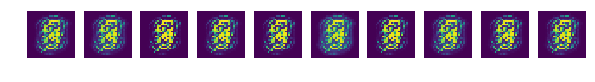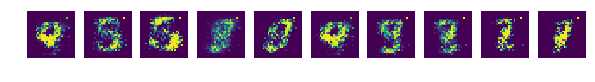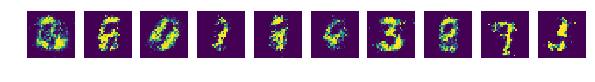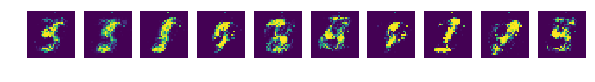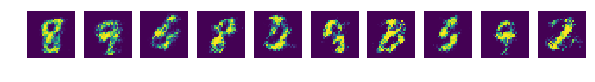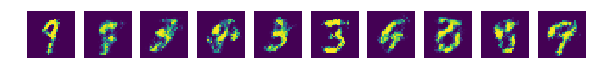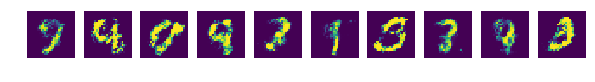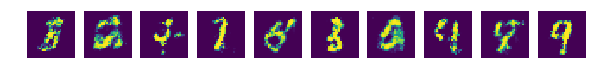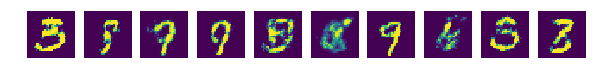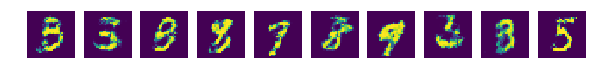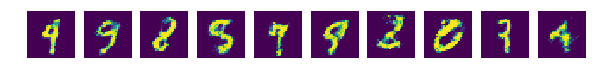

## 9.2 원하는 숫자 생성하기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128
n_class = 10

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [3]:
def generator(noise, labels):
    with tf.variable_scope('generator'):
        inputs = tf.concat([noise, labels], 1)
        
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf. layers.dense(hidden, n_input, activation=tf.nn.sigmoid)
        
    return output

In [4]:
def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        if reuse:
            scope.reuse_variables()
            
        inputs = tf.concat([inputs, labels], 1)
            
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
            
        output = tf.layers.dense(hidden, 1, activation=None)
            
    return output

In [5]:
def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

In [6]:
G = generator(Z, Y)

In [7]:
D_real = discriminator(X, Y)

In [8]:
D_gene = discriminator(G, Y, True)

In [9]:
loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.zeros_like(D_gene)))

loss_D = loss_D_real + loss_D_gene

In [10]:
loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.ones_like(D_gene)))

In [11]:
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list=vars_G)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Y: batch_ys, Z: noise})
        
    print('Epoch:', '%04d' %epoch,
         'D loss: {:.4}'.format(loss_val_D),
         'G loss: {:.4}'.format(loss_val_G))
    
    #확인용 이미지 생성
    if epoch == 0  or (epoch + 1) % 10 ==0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], Z: noise})
        
        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
        
        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()
            
            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28,28)))
            
        plt.savefig('samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
        
print('최적화 완료!')

Epoch: 0000 D loss: 0.006295 G loss: 7.621
Epoch: 0001 D loss: 0.01395 G loss: 7.76
Epoch: 0002 D loss: 0.008292 G loss: 7.363
Epoch: 0003 D loss: 0.01072 G loss: 7.368
Epoch: 0004 D loss: 0.079 G loss: 7.901
Epoch: 0005 D loss: 0.03232 G loss: 7.611
Epoch: 0006 D loss: 0.03166 G loss: 7.456
Epoch: 0007 D loss: 0.03461 G loss: 9.353
Epoch: 0008 D loss: 0.08204 G loss: 6.635
Epoch: 0009 D loss: 0.08241 G loss: 6.14
Epoch: 0010 D loss: 0.08913 G loss: 6.171
Epoch: 0011 D loss: 0.1952 G loss: 5.253
Epoch: 0012 D loss: 0.2849 G loss: 5.031
Epoch: 0013 D loss: 0.3498 G loss: 4.224
Epoch: 0014 D loss: 0.5601 G loss: 4.86
Epoch: 0015 D loss: 0.4173 G loss: 3.945
Epoch: 0016 D loss: 0.4769 G loss: 3.425
Epoch: 0017 D loss: 0.581 G loss: 4.572
Epoch: 0018 D loss: 0.4542 G loss: 4.191
Epoch: 0019 D loss: 0.4703 G loss: 2.95
Epoch: 0020 D loss: 0.5646 G loss: 2.658
Epoch: 0021 D loss: 0.6467 G loss: 3.248
Epoch: 0022 D loss: 0.5197 G loss: 3.54
Epoch: 0023 D loss: 0.6449 G loss: 2.621
Epoch: 0024

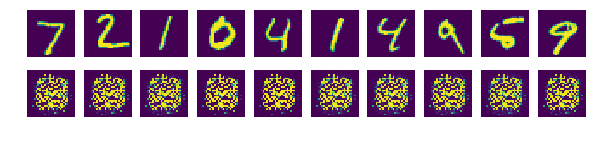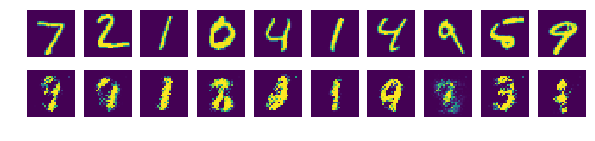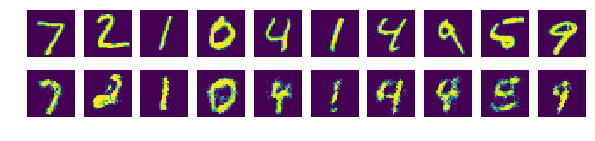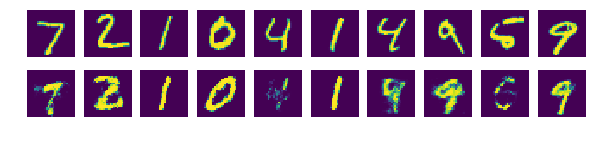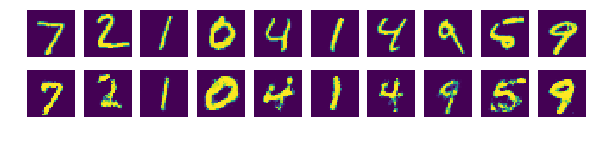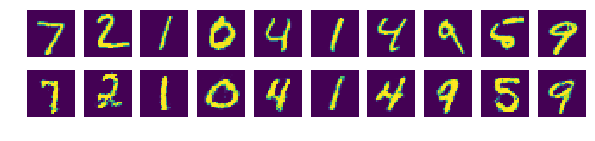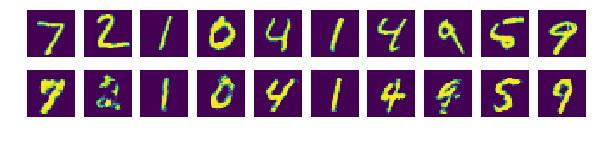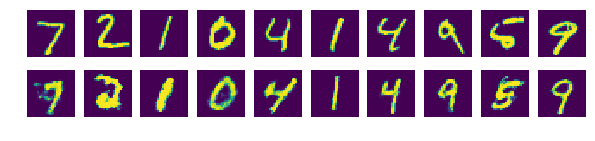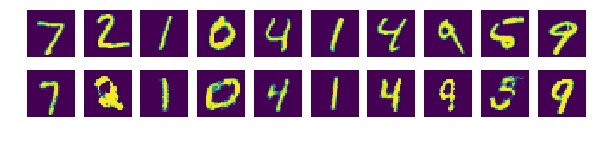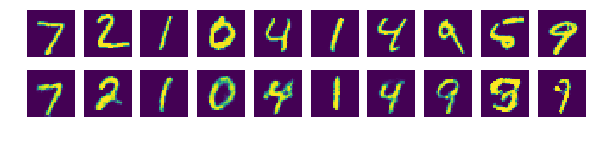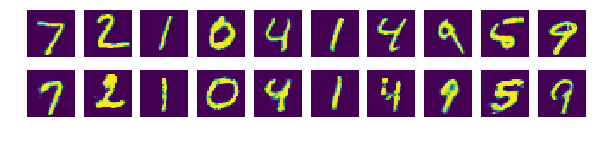